In [19]:
import numpy as np
import pandas as pd
import random
from collections import defaultdict
import gym
import gym_minigrid
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
class SARSA:
    def __init__(self, actions, agent_indicator=10):
        self.actions = actions
        self.agent_indicator = agent_indicator
        self.alpha = 0.01
        self.gamma = 0.9
        self.epsilon = 0.2
        self.q_values = defaultdict(lambda: [0.0] * actions)
        
    def _convert_state(self, s):
        return np.where(s == self.agent_indicator)[0][0]
        
    def update(self, state, action, reward, next_state, next_action):
        state = self._convert_state(state)
        next_state = self._convert_state(next_state)
        
        q_value = self.q_values[state][action]
        
        ########################## Write Code ####################################
        next_q_value = self.q_values[next_state][next_action]
        td_error = reward + self.gamma * next_q_value - q_value
        self.q_values[state][action] = q_value + self.alpha*td_error
        return
        ###########################################################################
    def act(self, state):
        #################### Write epsilion greedy code ###########################
        if np.random.rand() < self.epsilon:
            action = np.random.randint(self.actions)
        else:
            state = self._convert_state(state)
            q_values = self.q_values[state]
            action = np.argmax(q_values)
        ###########################################################################
        return action

class QLearning(SARSA):
    def __init__(self, actions, agent_indicator=10):
        super().__init__(actions, agent_indicator)
        
    def update(self, state, action, reward, next_state, next_action):
        state = self._convert_state(state)
        next_state = self._convert_state(next_state)
        _ = next_action
        q_value = self.q_values[state][action]
        
        ########################## Write Code ####################################
        
        next_q_value = np.max(self.q_values[next_state])# max
        td_error = reward + self.gamma * next_q_value - q_value
        self.q_values[state][action] = q_value + self.alpha*td_error
        return
        ###########################################################################

In [21]:
from utils import gen_wrapped_env, show_video

## SARSA

In [22]:
env = gen_wrapped_env('MiniGrid-Empty-6x6-v0')
#env = gen_wrapped_env('MiniGrid-DoorKey-5x5-v0')

obs = env.reset()

agent_position = obs[0]

agent = SARSA(4, agent_position)

In [ ]:
rewards = []
for ep in range(500000):
    done = False
    obs = env.reset()
    action = agent.act(obs)
    
    ep_rewards = 0
    while not done:
        next_obs, reward, done, info = env.step(action)

        next_action = agent.act(next_obs)
        agent.update(obs, action, reward, next_obs, next_action)
        
        ep_rewards += reward
        obs = next_obs
        action = next_action
    rewards.append(ep_rewards)
    if (ep+1) % 20 == 0:
        print("episode: {}, rewards: {}".format(ep+1, ep_rewards))
env.close()

In [24]:
{s:np.round(q, 5).tolist() for s, q in agent.q_values.items()}

{0: [0.02336, 0.02345, 0.02882, 0.02337],
 3: [0.01757, 0.01753, 0.01801, 0.01753],
 15: [0.06884, 0.06896, 0.07122, 0.06897],
 27: [0.1675, 0.16732, 0.17833, 0.16727],
 6: [0.01828, 0.01834, 0.0198, 0.01828],
 9: [0.01916, 0.01922, 0.02266, 0.01907],
 12: [0.04309, 0.04352, 0.05096, 0.04325],
 24: [0.05832, 0.05924, 0.06532, 0.05863],
 36: [0.06664, 0.06667, 0.06667, 0.06675],
 30: [0.21623, 0.21642, 0.24985, 0.21538],
 33: [0.23733, 0.23561, 0.31191, 0.23812],
 18: [0.08955, 0.08935, 0.09993, 0.08937],
 21: [0.10063, 0.10025, 0.12545, 0.1005],
 39: [0.35636, 0.35721, 0.39205, 0.35644],
 42: [0.46784, 0.47073, 0.50066, 0.47104],
 45: [0.0, 0.0, 0.0, 0.0]}

In [25]:
show_video()

In [26]:
pd.Series(rewards).to_csv('./logs/rewards_sarsa.csv')

In [27]:
sarsa_logs = pd.read_csv('./logs/rewards_sarsa.csv', index_col=False).iloc[:, 1]
#q_logs = pd.read_csv('./logs/rewards_qlearning.csv', index_col=False).iloc[:, 1]

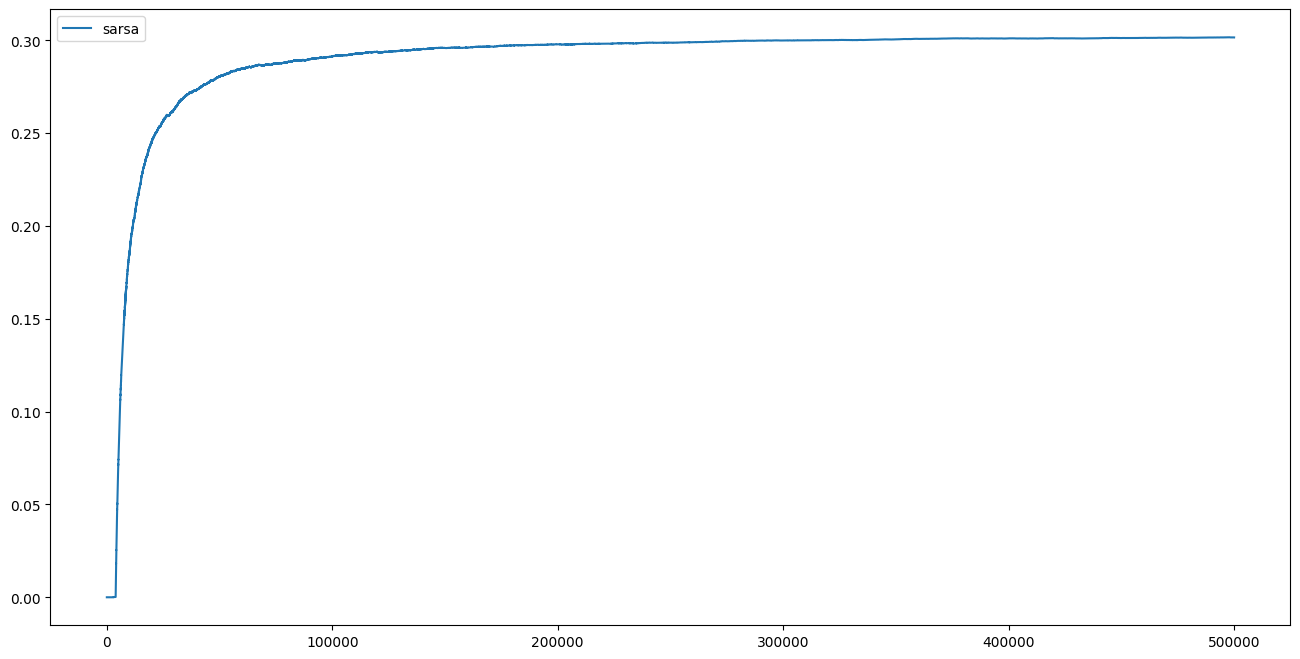

In [28]:
plt.figure(figsize=(16, 8))
plt.plot(sarsa_logs.cumsum() / (pd.Series(np.arange(sarsa_logs.shape[0]))+1), label="sarsa")
# plt.plot(sarsa_logs.cumsum() / (pd.Series(np.arange(sarsa_logs.shape[0]))+1), label="SARSA")
plt.legend()

## Q-Learning

In [29]:
obs = env.reset()

agent_position = obs[0]

agent_Q = QLearning(4, agent_position)

In [ ]:
rewards = []
for ep in range(500000):
    done = False
    obs = env.reset()
    action = agent_Q.act(obs)
    
    ep_rewards = 0
    while not done:
        next_obs, reward, done, info = env.step(action)

        next_action = agent_Q.act(next_obs)
        agent_Q.update(obs, action, reward, next_obs, next_action)
        
        ep_rewards += reward
        obs = next_obs
        action = next_action
    rewards.append(ep_rewards)
    if (ep+1) % 20 == 0:
        print("episode: {}, rewards: {}".format(ep+1, ep_rewards))
env.close()

In [31]:
{s:np.round(q, 5).tolist() for s, q in agent_Q.q_values.items()}

{0: [0.03363, 0.03357, 0.03672, 0.03361],
 12: [0.05835, 0.05814, 0.06316, 0.05845],
 24: [0.07639, 0.07615, 0.08695, 0.07641],
 15: [0.08527, 0.08421, 0.09266, 0.0853],
 3: [0.02698, 0.02709, 0.02823, 0.02702],
 6: [0.02889, 0.02878, 0.0292, 0.02886],
 18: [0.10578, 0.10491, 0.11965, 0.10362],
 27: [0.18986, 0.18919, 0.20478, 0.18888],
 9: [0.02869, 0.02864, 0.02871, 0.02873],
 30: [0.24097, 0.23834, 0.27529, 0.23631],
 21: [0.13729, 0.13761, 0.13796, 0.13797],
 36: [0.09408, 0.09452, 0.10175, 0.09475],
 39: [0.3842, 0.38401, 0.40699, 0.38262],
 42: [0.4892, 0.48628, 0.49416, 0.48671],
 33: [0.28949, 0.28824, 0.30583, 0.28925],
 45: [0.0, 0.0, 0.0, 0.0]}

In [32]:
show_video()

In [33]:
pd.Series(rewards).to_csv('./logs/rewards_qlearning.csv')

In [34]:
q_logs = pd.read_csv('./logs/rewards_qlearning.csv', index_col=False).iloc[:, 1]

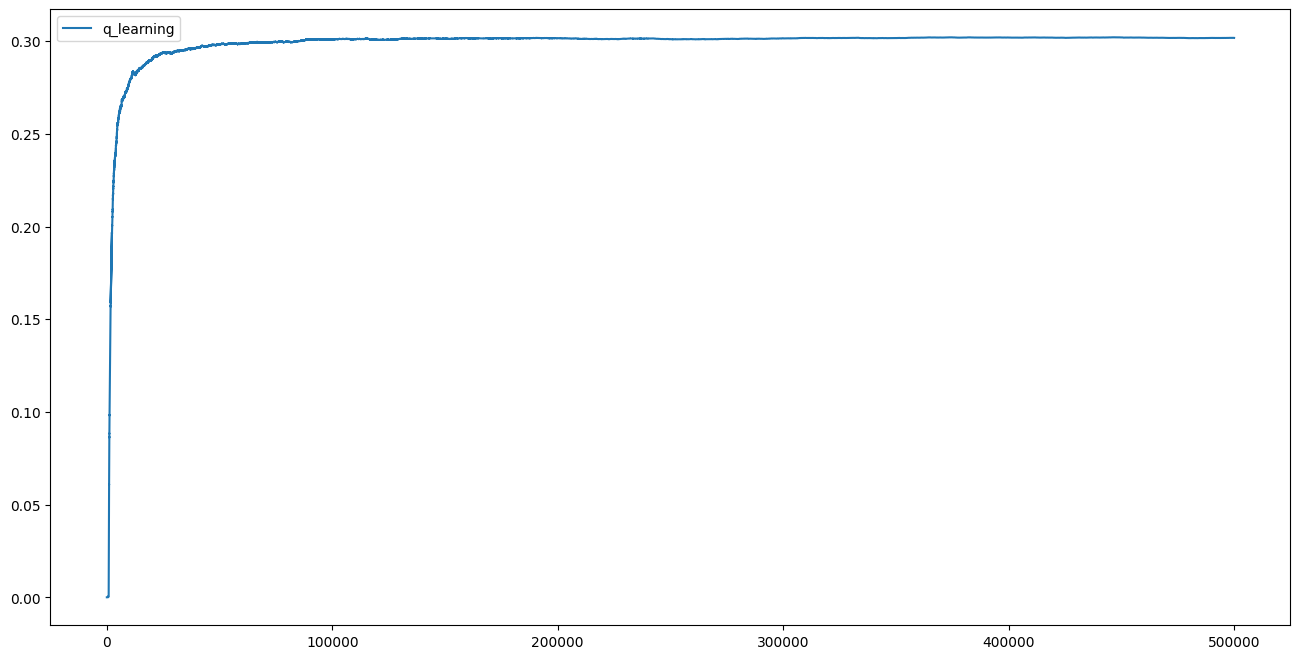

In [35]:
plt.figure(figsize=(16, 8))
plt.plot(q_logs.cumsum() / (pd.Series(np.arange(q_logs.shape[0]))+1), label="q_learning")
plt.legend()

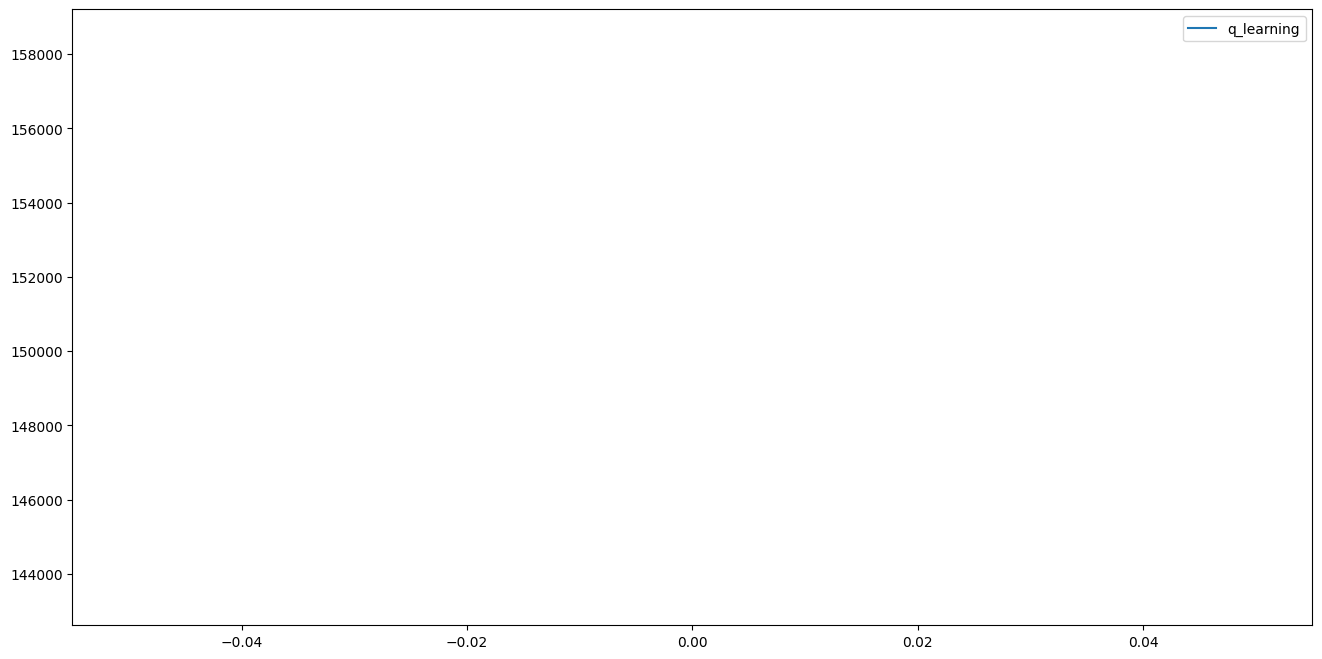

In [38]:
plt.figure(figsize=(16, 8))
plt.plot(q_logs.sum(), label="q_learning")
plt.legend()